In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ablation

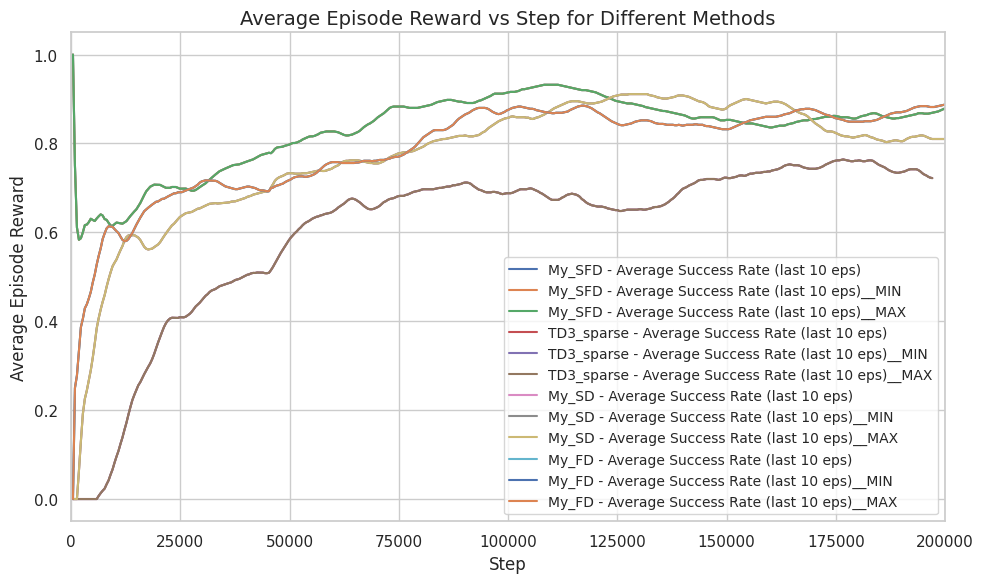

图像已保存到: wandbtest/figs/success_rate_plot_seaborn.png


In [5]:
# 加载 CSV 文件
file_path = '/home/xlx9645/failed/wandbtest/wandb_export_2024-12-27T19_59_46.857-06_00.csv'
data = pd.read_csv(file_path)
n = 100

# 设置要保存图像的文件夹
save_dir = 'wandbtest/figs'
os.makedirs(save_dir, exist_ok=True)  # 如果文件夹不存在，创建它

# 图像保存路径
save_path = os.path.join(save_dir, 'success_rate_plot_seaborn.png')
methods = [col for col in data.columns if col != "Step"]
# 初始化图像
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 绘制曲线
for method in methods:
    if method in data.columns:
        valid_data = data[method][~pd.isna(data[method])]
        moving_avg = []  # 用于存储每个点的前 n 个点（包括当前点）的平均值
        for i in range(len(valid_data)):
            # 取前 n 个点（包括当前点），不足 n 个点则取所有点
            window = valid_data[max(0, i - (n - 1)):i + 1]
            moving_avg.append(window.mean())
        # 使用 Seaborn 绘图
        sns.lineplot(
            x=data["Step"][~pd.isna(data[method])],
            y=moving_avg,
            label=method
        )


# 限制横坐标范围
plt.xlim(0, 200000)

plt.xlabel("Step", fontsize=12)
plt.ylabel("Average Episode Reward", fontsize=12)
plt.title("Average Episode Reward vs Step for Different Methods", fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# 保存图像并显示
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"图像已保存到: {save_path}")